In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
PNG_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/img/"
NPZ_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/npz/"

In [3]:
circle = np.load(NPZ_PATH + 'circular_mov.npz')
square = np.load(NPZ_PATH + 'square_mov.npz')

In [4]:
circle_images = circle.f.arr_0
square_images = square.f.arr_0

In [5]:
circle_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [6]:
square_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [7]:
train_cir_img = circle_images[:800]
train_sqr_img = square_images[:800]
test_cir_img = circle_images[800:1000]
test_sqr_img = square_images[800:1000]

In [8]:
train_cir_sqr_img = np.concatenate((train_cir_img, train_sqr_img))
test_cir_sqr_img = np.concatenate((test_cir_img, test_sqr_img))

In [9]:
# o array tem 100 imagens de circulo e 100 de quadrados com formato 50x50
print(len(train_cir_sqr_img))
print(len(test_cir_sqr_img))

1600
400


In [10]:
train_images_target = []
test_images_target = []
for i in range(800):
    zero_um = (0,1)
    train_images_target.append(zero_um)
    
for i in range(800):
    um_zero = (1,0)
    train_images_target.append(um_zero)
    
for i in range(200):
    zero_um = (0,1)
    test_images_target.append(zero_um)
    
for i in range(200):
    um_zero = (1,0)
    test_images_target.append(um_zero)

In [11]:
X = np.reshape(train_cir_sqr_img, (1600, 50, 50))
y = np.array(train_images_target)

In [12]:
import math
n_input_layer = 2500
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 50


In [13]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [14]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(50,50), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 5,152
Trainable params: 5,152
Non-trainable params: 0
_________________________________________________________________


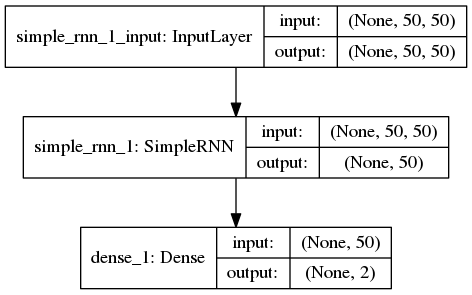

In [15]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [17]:
history = model.fit(X, y, epochs = 100, batch_size = 32, callbacks=[es])

Epoch 1/100
1600/1600 [==============================] - 1s 491us/step - loss: 0.6545 - accuracy: 0.6109
Epoch 2/100
 576/1600 [=========>....................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7491

/home/ryo/miniconda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1600/1600 [==============================] - 0s 292us/step - loss: 0.4827 - accuracy: 0.7850
Epoch 3/100
1600/1600 [==============================] - 0s 285us/step - loss: 0.3497 - accuracy: 0.8519
Epoch 4/100
1600/1600 [==============================] - 0s 289us/step - loss: 0.2993 - accuracy: 0.8644
Epoch 5/100
1600/1600 [==============================] - 0s 288us/step - loss: 0.2734 - accuracy: 0.8841
Epoch 6/100
1600/1600 [==============================] - 0s 284us/step - loss: 0.2593 - accuracy: 0.8769
Epoch 7/100
1600/1600 [==============================] - 0s 285us/step - loss: 0.2404 - accuracy: 0.8728
Epoch 8/100
1600/1600 [==============================] - 0s 284us/step - loss: 0.2283 - accuracy: 0.8709
Epoch 9/100
1600/1600 [==============================] - 0s 290us/step - loss: 0.2294 - accuracy: 0.8734
Epoch 10/100
1600/1600 [==============================] - 0s 291us/step - loss: 0.2118 - accuracy: 0.8800
Epoch 11/100
1600/1600 [==============================] - 0s 286us

1600/1600 [==============================] - 0s 259us/step - loss: 0.1757 - accuracy: 0.8856
Epoch 80/100
1600/1600 [==============================] - 0s 309us/step - loss: 0.1768 - accuracy: 0.8806
Epoch 81/100
1600/1600 [==============================] - 1s 324us/step - loss: 0.1768 - accuracy: 0.8856
Epoch 82/100
1600/1600 [==============================] - 1s 320us/step - loss: 0.1754 - accuracy: 0.8947
Epoch 83/100
1600/1600 [==============================] - 1s 325us/step - loss: 0.1750 - accuracy: 0.8841
Epoch 84/100
1600/1600 [==============================] - 0s 272us/step - loss: 0.1757 - accuracy: 0.8859
Epoch 85/100
1600/1600 [==============================] - 0s 261us/step - loss: 0.1756 - accuracy: 0.8856
Epoch 86/100
1600/1600 [==============================] - 0s 253us/step - loss: 0.1770 - accuracy: 0.8866
Epoch 87/100
1600/1600 [==============================] - 0s 259us/step - loss: 0.1749 - accuracy: 0.8819
Epoch 88/100
1600/1600 [==============================] - 0

In [18]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


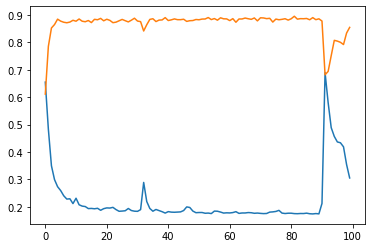

In [19]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')

In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
# test = np.reshape(test, (40, 1000, 1))

In [22]:
test = np.reshape(test_cir_sqr_img, (400, 50, 50))
test_target = np.array(test_images_target)

In [23]:
predictions = model.predict(test_cir_sqr_img)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[0.007133 0.991601] expected [0 1]
[0.16118741 0.80898327] expected [0 1]
[0.02051323 0.974739  ] expected [0 1]
[0.3599261  0.64712584] expected [0 1]
[0.5159158 0.4335484] expected [0 1]
[0.00209738 0.9970618 ] expected [0 1]
[0.41042125 0.5765637 ] expected [0 1]
[0.08865412 0.9400868 ] expected [0 1]
[0.16941349 0.7988181 ] expected [0 1]
[0.36319616 0.62746125] expected [0 1]
[0.2955236 0.7280309] expected [0 1]
[0.02354398 0.9738481 ] expected [0 1]
[0.40981045 0.53327215] expected [0 1]
[0.1236017  0.91279006] expected [0 1]
[0.6128343  0.35067216] expected [0 1]
[0.05304538 0.94574577] expected [0 1]
[0.00625989 0.99321413] expected [0 1]
[0.07792624 0.9250142 ] expected [0 1]
[0.03096084 0.97072583] expected [0 1]
[0.02260289 0.9744187 ] expected [0 1]
[0.00136699 0.99802375] expected [0 1]
[0.36319616 0.62746125] expected [0 1]
[0.00136699 0.99802375] expected [0 1]
[0.9853307  0.01507884] expected [0 1]
[0.4416059 0.549849 ] expected [0 1]
[0.00276914 0.9962121 ] expected [0

[0.84220487 0.16052744] expected [1 0]
[0.8400266  0.17093863] expected [1 0]
[0.953722   0.04874214] expected [1 0]
[0.98462474 0.0155204 ] expected [1 0]
[0.98490113 0.01634937] expected [1 0]
[0.93550086 0.07228146] expected [1 0]
[0.4394911  0.50611275] expected [1 0]
[0.99708635 0.00431472] expected [1 0]
[0.40981045 0.53327215] expected [1 0]
[0.4394911  0.50611275] expected [1 0]
[0.8463669  0.16345935] expected [1 0]
[0.8788588  0.17541718] expected [1 0]
[0.99634874 0.00527617] expected [1 0]
[0.99470055 0.00713835] expected [1 0]
[0.9874069  0.01315109] expected [1 0]
[0.99685585 0.00580746] expected [1 0]
[0.40116408 0.608115  ] expected [1 0]
[0.9454194 0.0478343] expected [1 0]
[0.40472788 0.57724375] expected [1 0]
[0.9310615  0.06524648] expected [1 0]
[0.36319616 0.62746125] expected [1 0]
[0.9945866 0.0099138] expected [1 0]
[0.7154816 0.2665187] expected [1 0]
[0.9863056 0.0146127] expected [1 0]
[0.9887509  0.01421107] expected [1 0]
[0.8526329  0.16080315] expected 

In [24]:
test_target_arr = np.array(test_target)

In [25]:
predictions_rounded = np.matrix.round(predictions)

In [26]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [27]:
y_pred_classes

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [28]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [30]:
print(matrix)

[[162  29]
 [ 38 171]]
